Gorka Sánchez de Pedro Barrios y Álvaro Pérez de Rojas
 # Práctica 2 de Machine Learning, Modelos Supervisados: Predicción de duración de viajes y detección de emergencias en tweets
 

#### Índice
<ol>
    Parte 1:
    <li><a href="#p_1_1" >Pregunta 1</a></li>
    <li><a href="#p_1_2">Pregunta 2</a></li>
    <li><a href="#p_1_3">Pregunta 3</a></li>
    <li><a href="#p_1_4">Pregunta 4</a></li>
    <li><a href="#p_1_5">Pregunta 5</a></li>
    Parte 2:
    <li><a href="#p_2_1">Pregunta 1</a></li>
    <li><a href="#p_2_2">Pregunta 2</a></li>
 
 </ol>

***

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import PowerTransformer

## Parte 1: Predicción de duración de viajes

Este primer conjunto de datos (uber_time_examples.csv, uber_time_labels.csv) proviene de un servicio de transporte tipo Uber. Consiste en alrededor de 400000 viajes realizados por los usuarios. La tarea es predecir la duración (en segundos) del viaje. 

IMPORTANTE: El conjunto de datos puede ser demasiado grande para ser procesado, en tiempos razonables, en un ordenador personal o portatil. Es por eso, que se puede trabajar, si se considera, con un subconjunto de estos datos de por ejemplo 20. 000 elementos

In [60]:
uber_time_examples = pd.read_csv("uber_time_examples.csv")
uber_time_examples.head(5)

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10
0,0,01-07 17:04:08,2,1.20,263,141,12.513054,297.430685,56.317405,405.20,0.408689,126.689773
1,1,03-02 17:41:40,1,0.88,246,68,6.256527,278.205127,27.160167,314.88,-0.256911,126.693467
2,2,02-17 12:15:00,3,7.61,24,13,18.769581,27.141964,5.192385,44.61,56.880789,126.615789
3,3,03-30 13:59:42,1,1.50,239,163,6.256527,270.288721,65.104518,403.50,1.218689,126.686311
4,4,02-14 18:26:55,1,1.20,142,229,6.256527,160.589952,91.465857,372.20,0.408689,126.689773


In [61]:
uber_time_labels = pd.read_csv("uber_time_labels.csv")
uber_time_labels.head(5)

,id,duration
0,0,455.0
1,1,413.0
2,2,1501.0
3,3,514.0
4,4,605.0


In [62]:
uber_data  = pd.merge(uber_time_examples, uber_time_labels, on = 'id', how = 'left').sample(20000, random_state = 123)
uber_data.head(5)

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,duration
386128,386128,02-26 21:22:07,2,1.42,249,231,12.513054,281.597873,92.264685,481.42,0.985089,126.687234,280.0
297944,297944,03-02 01:13:42,1,1.10,170,162,6.256527,192.255576,64.705104,333.10,0.178689,126.690927,259.0
164196,164196,01-15 17:10:23,1,1.56,170,48,6.256527,192.255576,19.171883,219.56,1.402289,126.685618,568.0
76962,76962,02-28 10:39:13,1,0.50,48,48,6.256527,54.283927,19.171883,96.50,-0.781311,126.697853,296.0
52185,52185,01-19 12:51:01,1,0.72,237,236,6.256527,268.026891,94.261756,473.72,-0.512911,126.695313,285.0


<h2 id="p_1_1">Pregunta 1</h2>

Realizar preprocesamiento de datos: imputar valores faltantes, transformar variables categóricas, estandarizar variables numéricas, etc.
si lo consideras necesario para futuros modelos. Puede ser interesante intentar adaptar las variables que no siguan una distribución normal mediante técnicas de mapeado a gausianas como Power Transformers

In [63]:
# (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html#sklearn.preprocessing.PowerTransformer).

In [64]:
# Detección de valores faltantes
for c in uber_data.columns.tolist():
    print('# de valores faltantes en la variable ',c, ': ', sum(uber_data[c].isnull()))

# de valores faltantes en la variable  id :  0
# de valores faltantes en la variable  feature_0 :  0
# de valores faltantes en la variable  feature_1 :  0
# de valores faltantes en la variable  feature_2 :  0
# de valores faltantes en la variable  feature_3 :  0
# de valores faltantes en la variable  feature_4 :  0
# de valores faltantes en la variable  feature_5 :  0
# de valores faltantes en la variable  feature_6 :  0
# de valores faltantes en la variable  feature_7 :  0
# de valores faltantes en la variable  feature_8 :  0
# de valores faltantes en la variable  feature_9 :  0
# de valores faltantes en la variable  feature_10 :  0
# de valores faltantes en la variable  duration :  0


In [65]:
# Detección de tipología de variables
pd.DataFrame(uber_data.dtypes).T


,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,duration
0,int64,object,int64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64


In [66]:
uber_data.nunique()

id            20000
feature_0     19962
feature_1         7
feature_2      1469
feature_3       144
feature_4       212
feature_5         7
feature_6       144
feature_7       212
feature_8     11129
feature_9      1469
feature_10     1469
duration       2693
dtype: int64

In [67]:
pd.unique(uber_data['feature_1'].tolist())

array([2, 1, 3, 4, 5, 6, 0])

In [68]:
# Cambio de tipología de variables

uber_data['id'] = uber_data['id'].astype(str) # el identificador no se considera un dato que se deba tratar numericamente
uber_data['feature_0'] = pd.to_datetime(uber_data['feature_0'], format='%m-%d %H:%M:%S') # la fecha se puede tratar mejor en un formato propio
pd.DataFrame(uber_data.dtypes).T

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,duration
0,object,datetime64[ns],int64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64


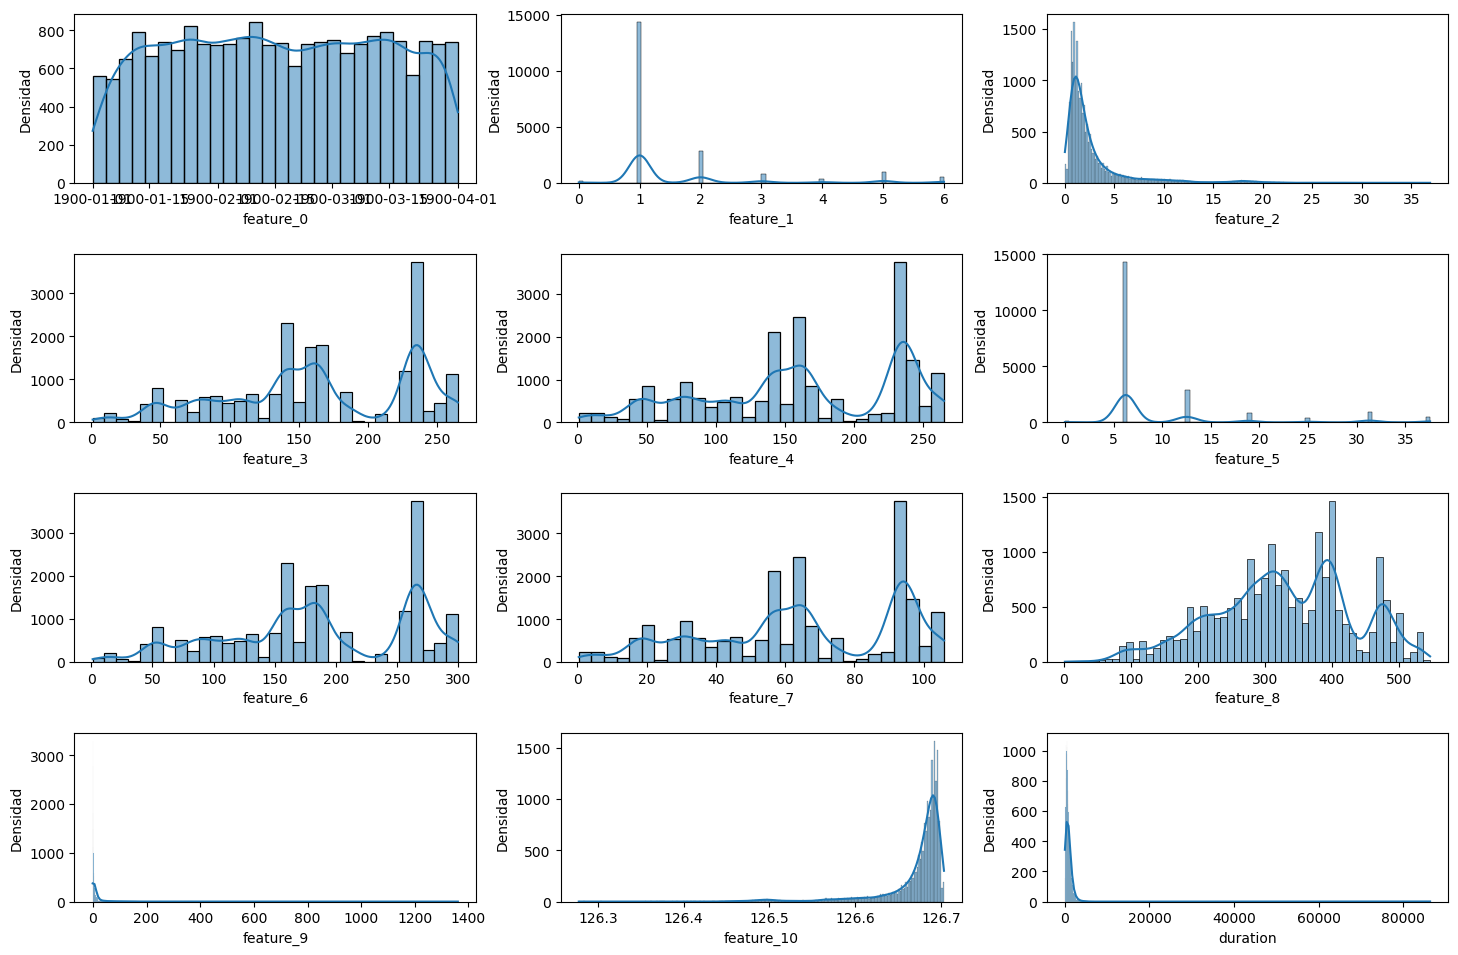

In [69]:
# Detección de variables con distribuciones significativamente anormales

variables = uber_data.drop('id', axis=1).columns
num_cols = 3
num_filas = (len(variables) - 1) // num_cols + 1
fig, axes = plt.subplots(num_filas, num_cols, figsize=(15, 10))
fig.tight_layout(pad=3)


for i, variable in enumerate(variables):
    fila = i // num_cols
    col = i % num_cols
    ax = axes[fila, col]
    sns.histplot(uber_data[variable], kde=True, ax=ax)
    ax.set_xlabel(variable)
    ax.set_ylabel('Densidad')

plt.show()


## HE UTILIZADO EL TRANSFORMER PARA NORMALIZAR LA VARIABLE DURATION Y LUEGO PODER VOLVR A INVERTIRLA A LOS VALORES REALES PARA CALCULAR LOS MAPES CORRECTAMENTE DEJO LA ANTERIOR TRANFORMACION COMENTADA POR SI HICIESE FALTA . !!! ESTA HECHO EN LA PREGUNTA 2

In [70]:
# Corrección de anormalidad en mediante power transfrom

#uber_data['duration_2'] = PowerTransformer(method='yeo-johnson').fit_transform(uber_data[['duration']])

#sns.kdeplot(uber_data['duration_2'])
#plt.xlabel('Duration_2')
#plt.ylabel('Densidad')
#plt.show()

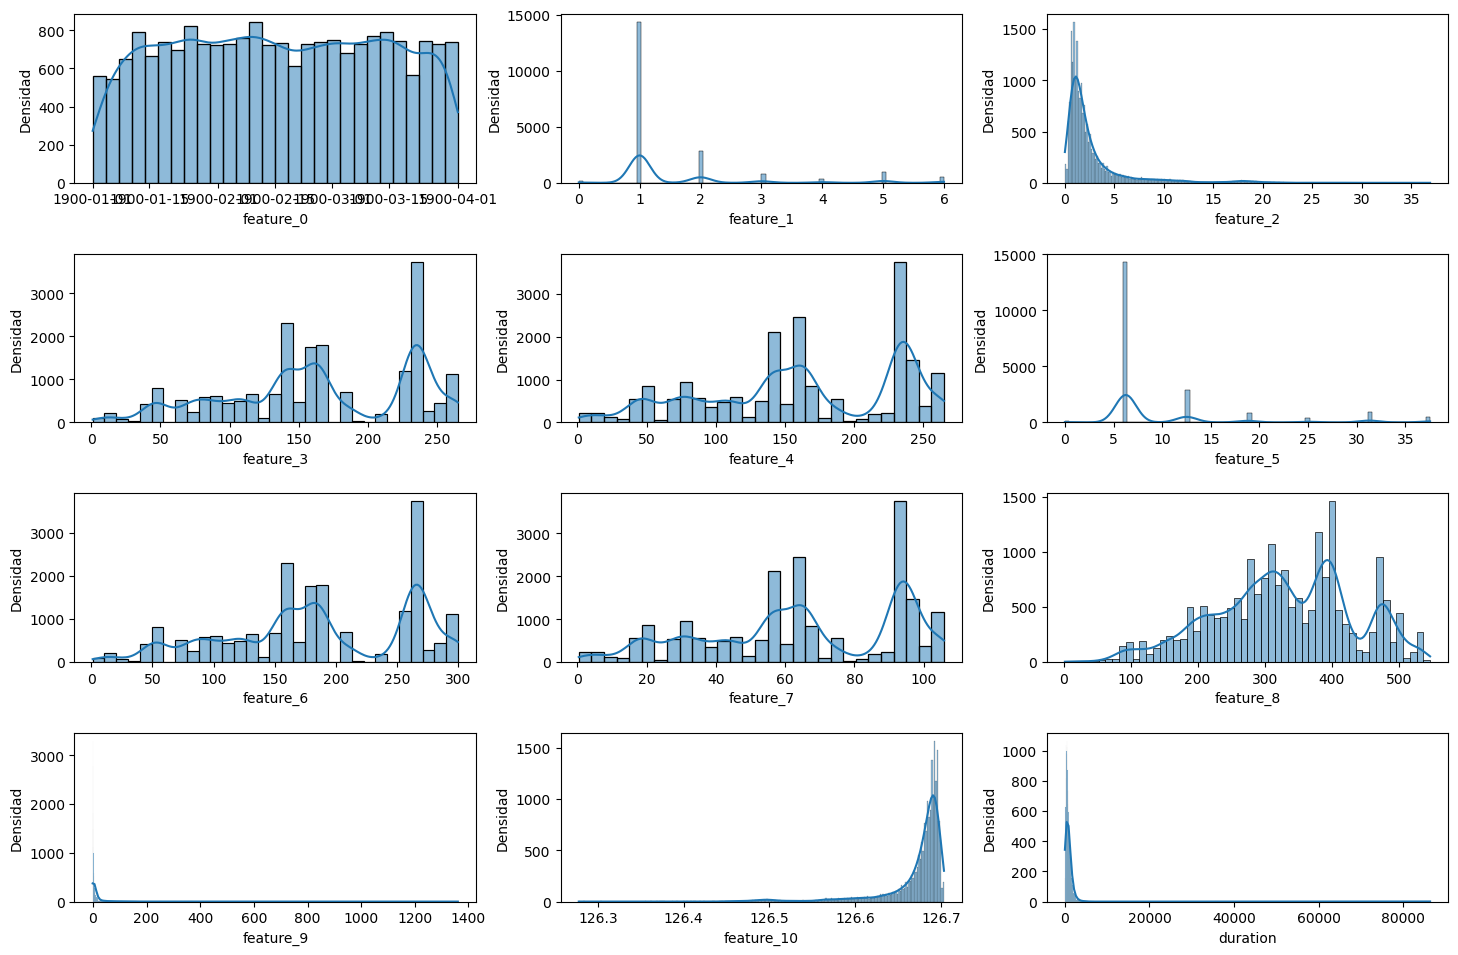

In [71]:
variables = uber_data.drop('id', axis=1).columns
num_cols = 3
num_filas = (len(variables) - 1) // num_cols + 1
fig, axes = plt.subplots(num_filas, num_cols, figsize=(15, 10))
fig.tight_layout(pad=3)


for i, variable in enumerate(variables):
    fila = i // num_cols
    col = i % num_cols
    ax = axes[fila, col]
    sns.histplot(uber_data[variable], kde=True, ax=ax)
    ax.set_xlabel(variable)
    ax.set_ylabel('Densidad')

plt.show()


<h2 id="p_1_2">Pregunta 2</h2>

Crear nuevas características (features) que puedan mejorar
el poder predictivo del modelo

In [72]:


uber_data['feature_0'] = pd.to_datetime(uber_data['feature_0'])
uber_data['month'] = uber_data['feature_0'].dt.month
uber_data['day'] = uber_data['feature_0'].dt.day


uber_data['feature_0'] = uber_data['feature_0'].astype(str)
uber_data['hour'] = uber_data['feature_0'].str.split(' ', expand=True)[1].str.split(':', expand=True)[0].astype(int)
uber_data['minute'] = uber_data['feature_0'].str.split(' ', expand=True)[1].str.split(':', expand=True)[1].astype(int)


# Calcular el día de la semana (0 = Lunes, 6 = Domingo) asumiendo que el 01-01 es un Lunes
uber_data['day_of_week'] = (uber_data['day'] - 1) % 7

# Funciones trigonométricas de la hora del día
uber_data['sin_hour'] = np.sin(2*np.pi*uber_data['hour']/24)
uber_data['cos_hour'] = np.cos(2*np.pi*uber_data['hour']/24)






He añadido las características de seno y coseno de la hora para capturar su naturaleza cíclica, evitando malinterpretaciones en la diferencia horaria y mejorando la precisión de los modelos.

In [73]:
uber_data

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,duration,month,day,hour,minute,day_of_week,sin_hour,cos_hour
386128,386128,1900-02-26 21:22:07,2,1.42,249,231,12.513054,281.597873,92.264685,481.42,0.985089,126.687234,280.0,2,26,21,22,4,-7.071068e-01,0.707107
297944,297944,1900-03-02 01:13:42,1,1.10,170,162,6.256527,192.255576,64.705104,333.10,0.178689,126.690927,259.0,3,2,1,13,1,2.588190e-01,0.965926
164196,164196,1900-01-15 17:10:23,1,1.56,170,48,6.256527,192.255576,19.171883,219.56,1.402289,126.685618,568.0,1,15,17,10,0,-9.659258e-01,-0.258819
76962,76962,1900-02-28 10:39:13,1,0.50,48,48,6.256527,54.283927,19.171883,96.50,-0.781311,126.697853,296.0,2,28,10,39,6,5.000000e-01,-0.866025
52185,52185,1900-01-19 12:51:01,1,0.72,237,236,6.256527,268.026891,94.261756,473.72,-0.512911,126.695313,285.0,1,19,12,51,4,1.224647e-16,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96542,96542,1900-02-01 14:29:51,1,1.90,75,140,6.256527,84.818636,55.917991,216.90,2.578689,126.681694,753.0,2,1,14,29,0,-5.000000e-01,-0.866025
247952,247952,1900-03-26 14:23:57,1,0.35,140,140,6.256527,158.328121,55.917991,280.35,-0.908811,126.699584,301.0,3,26,14,23,4,-5.000000e-01,-0.866025
320892,320892,1900-03-03 19:27:13,1,0.40,100,230,6.256527,113.091515,91.865271,330.40,-0.871311,126.699007,507.0,3,3,19,27,2,-9.659258e-01,0.258819
86263,86263,1900-01-12 19:58:03,1,0.43,162,162,6.256527,183.208255,64.705104,324.43,-0.846411,126.698660,210.0,1,12,19,58,4,-9.659258e-01,0.258819


In [74]:
transformer = PowerTransformer(method='yeo-johnson')
uber_data['duration_2'] = transformer.fit_transform(uber_data[['duration']])

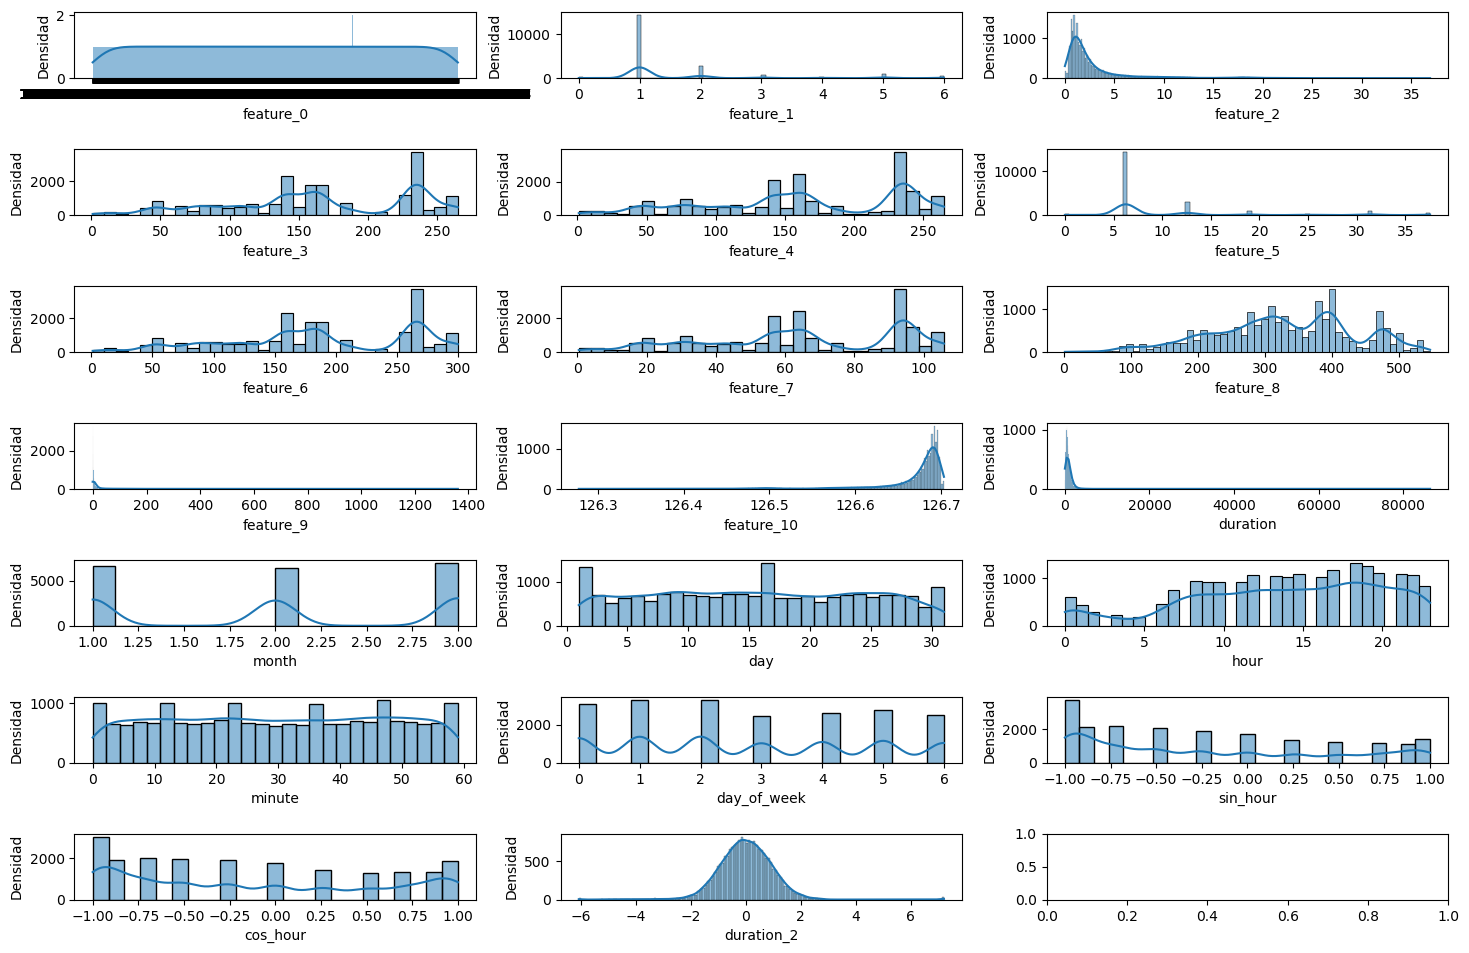

In [75]:
variables = uber_data.drop('id', axis=1).columns
num_cols = 3
num_filas = (len(variables) - 1) // num_cols + 1
fig, axes = plt.subplots(num_filas, num_cols, figsize=(15, 10))
fig.tight_layout(pad=3)


for i, variable in enumerate(variables):
    fila = i // num_cols
    col = i % num_cols
    ax = axes[fila, col]
    sns.histplot(uber_data[variable], kde=True, ax=ax)
    ax.set_xlabel(variable)
    ax.set_ylabel('Densidad')

plt.show()


<h2 id="p_1_3">Pregunta 3</h2>

Seleccionar las características más relevantes para predecir la duración del viaje. Utilizar técnicas de selección de características basadas en una sola variable o SelectFromModel. Evitar Recursive feature elimination debido a su alto coste computacional

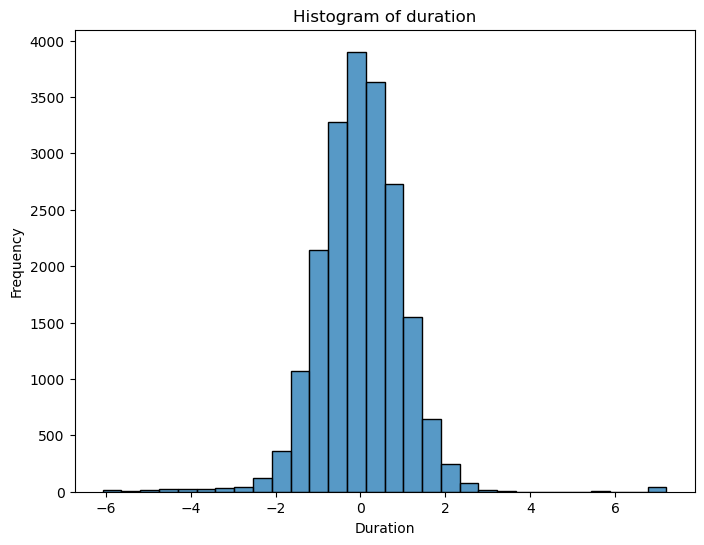

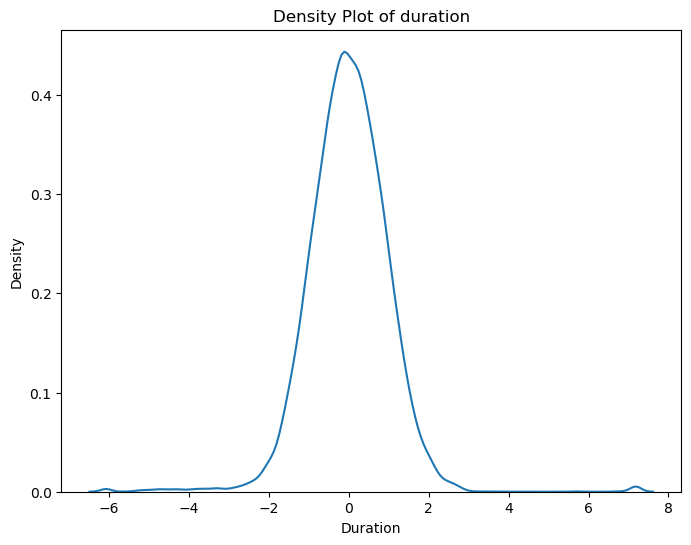

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma
plt.figure(figsize=(8,6))
sns.histplot(uber_data['duration_2'], kde=False, bins=30)
plt.title('Histogram of duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

# Gráfico de densidad
plt.figure(figsize=(8,6))
sns.kdeplot(uber_data['duration_2'])
plt.title('Density Plot of duration')
plt.xlabel('Duration')
plt.ylabel('Density')
plt.show()


In [77]:
print('Skewness: ', uber_data['duration_2'].skew())


Skewness:  0.14812292714061193


In [78]:
from sklearn.feature_selection import SelectKBest, f_regression, SelectFromModel
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# Separar las características y la variable objetivo
X = uber_data.drop(['id', 'duration_2','duration','feature_0'], axis=1)
y = uber_data['duration_2']

# Estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Selección univariante
selector_kbest = SelectKBest(score_func=f_regression, k=7)
X_kbest = selector_kbest.fit_transform(X_scaled, y)

# Mostrar las características seleccionadas
mask = selector_kbest.get_support()
kbest_features = X.columns[mask]
print("KBest selected features: ", kbest_features)

# SelectFromModel
estimator = RandomForestRegressor(random_state=42)
selector_model = SelectFromModel(estimator)
X_model = selector_model.fit_transform(X_scaled, y)

# Mostrar las características seleccionadas
estimator.fit(X_scaled, y)
mask = selector_model.get_support()
model_features = X.columns[mask]
print("Model selected features: ", model_features)


KBest selected features:  Index(['feature_2', 'feature_3', 'feature_4', 'feature_7', 'feature_8',
       'feature_9', 'feature_10'],
      dtype='object')
Model selected features:  Index(['feature_2', 'feature_9', 'feature_10'], dtype='object')


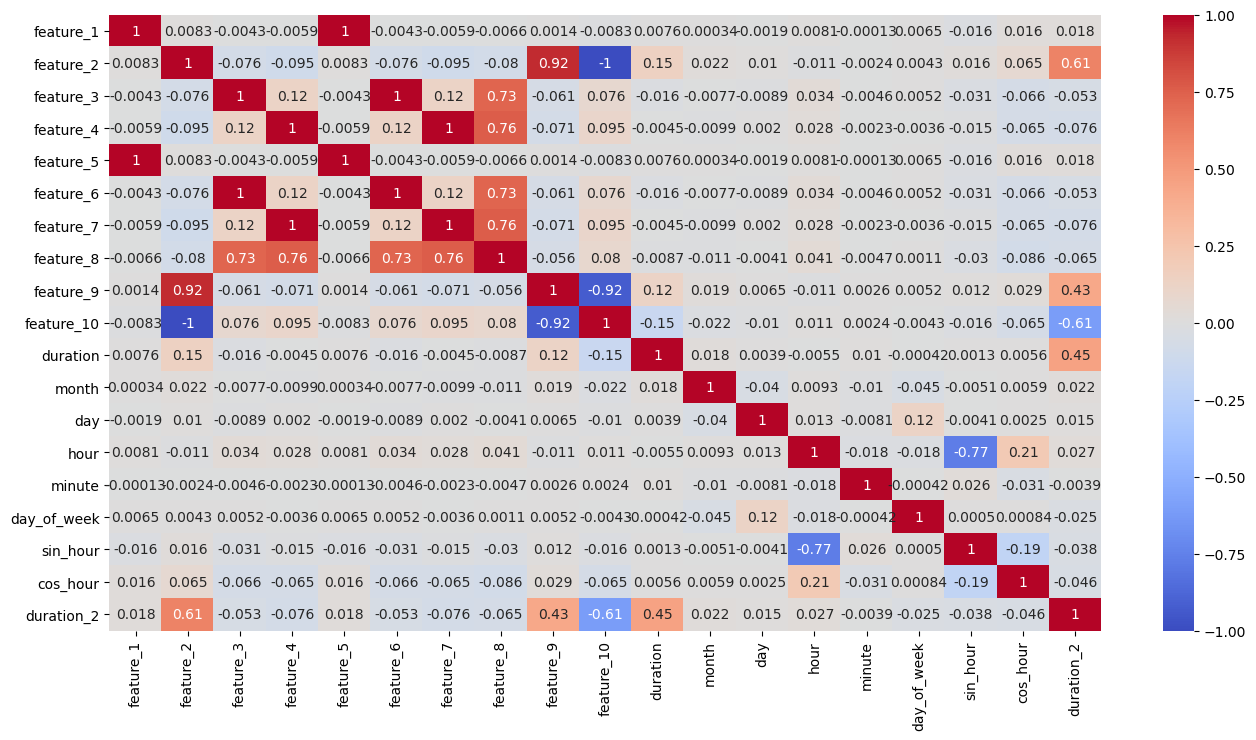

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = uber_data.corr()
plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


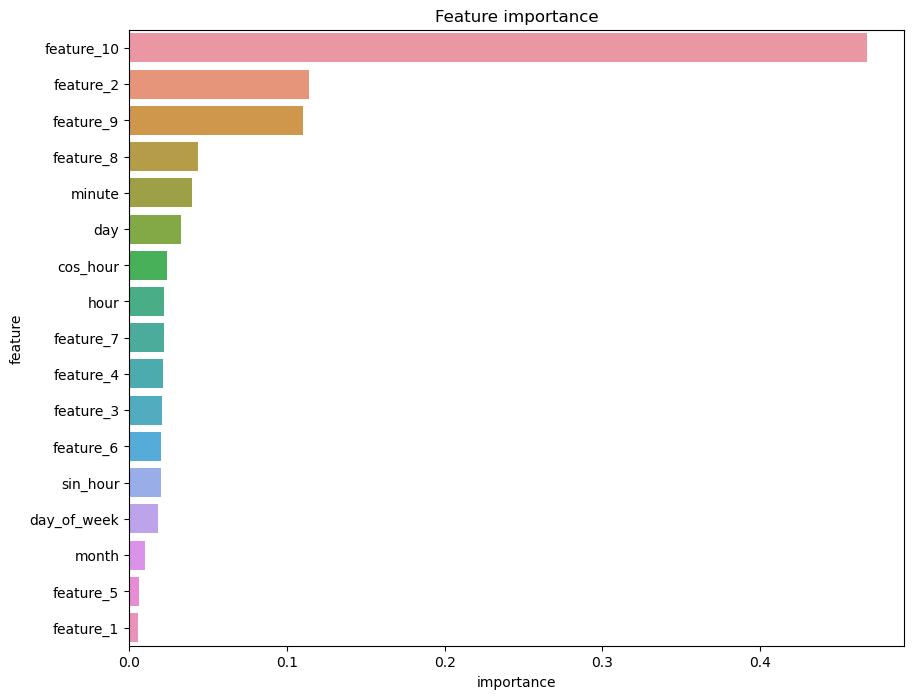

In [80]:
importance = pd.DataFrame({'feature': X.columns, 'importance': selector_model.estimator_.feature_importances_})
importance.sort_values('importance', ascending=False, inplace=True)

plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=importance)
plt.title('Feature importance')
plt.show()


Realizo el estimador con RandomForestRegressor ya que es mas preciso y complejo que la regresion lineal

In [81]:
#Ver : (https://scikit-learn.org/stable/modules/feature_selection.html)

<h2 id="p_1_4">Pregunta 4</h2>

Entrenar un modelo sencillo como base y medir su MAPE (Mean Absolute Percentage Error) en el conjunto de test. Luego, elegir y entrenar dos modelos más avanzados (por ejemplo, ensambladores, máquinas de soporte vectorial, modelos bayesianos, redes neuronales) y comparar sus MAPEs

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_percentage_error

# Crear conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Modelo base: Regresión lineal
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
mape_lr = mean_absolute_percentage_error(y_test, y_pred_lr)
print(f"MAPE for Linear Regression: {mape_lr}")

# Modelo avanzado 1: RandomForest
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)
print(f"MAPE for Random Forest: {mape_rf}")

# Modelo avanzado 2: SVR
model_svr = SVR()
model_svr.fit(X_train, y_train)
y_pred_svr = model_svr.predict(X_test)
mape_svr = mean_absolute_percentage_error(y_test, y_pred_svr)
print(f"MAPE for SVR: {mape_svr}")



MAPE for Linear Regression: 1.9297455573054536
MAPE for Random Forest: 1.8683812224518042
MAPE for SVR: 2.075121289920266


Como la variable a predecir se encuentra transformada y normalizada, deshacemos la transformacion para calcular los MAPES correctamente

In [83]:
from sklearn.metrics import mean_absolute_error

# Modelo base: Regresión lineal
y_pred_lr = model_lr.predict(X_test)
# Deshacer la transformación 
y_pred_lr_orig = transformer.inverse_transform(y_pred_lr.reshape(-1, 1))
y_test_orig = transformer.inverse_transform(y_test.values.reshape(-1, 1))
mape_lr = mean_absolute_error(y_test_orig, y_pred_lr_orig) / y_test_orig.mean()
print(f"MAPE for Linear Regression: {mape_lr}")

# Modelo avanzado 1: RandomForest
y_pred_rf = model_rf.predict(X_test)
# Deshacer la transformación 
y_pred_rf_orig = transformer.inverse_transform(y_pred_rf.reshape(-1, 1))
mape_rf = mean_absolute_error(y_test_orig, y_pred_rf_orig) / y_test_orig.mean()
print(f"MAPE for Random Forest: {mape_rf}")

# Modelo avanzado 2: SVR
y_pred_svr = model_svr.predict(X_test)
# Deshacer la transformación 
y_pred_svr_orig = transformer.inverse_transform(y_pred_svr.reshape(-1, 1))
mape_svr = mean_absolute_error(y_test_orig, y_pred_svr_orig) / y_test_orig.mean()
print(f"MAPE for SVR: {mape_svr}")


MAPE for Linear Regression: 0.42971967401202166


c:\Users\gorka\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  "X does not have valid feature names, but"
c:\Users\gorka\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  "X does not have valid feature names, but"
c:\Users\gorka\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  "X does not have valid feature names, but"


MAPE for Random Forest: 0.36631881140588185
MAPE for SVR: 0.3630750117409946


c:\Users\gorka\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  "X does not have valid feature names, but"


<h2 id="p_1_5">Pregunta 5</h2>

Optimizar los hiperparámetros de los dos últimos modelos utilizando validación cruzada (cross-validation) y comparar sus MAPEs. Elegir el mejor modelo basándose en estos resultados

#### Optimizacion Random Forest

In [87]:
from sklearn.model_selection import GridSearchCV

# Definir los parámetros a ajustar
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}


# Instanciar el modelo RandomForestRegressor
model_rf = RandomForestRegressor(random_state=42)

# Crear el objeto GridSearchCV
grid_search_rf = GridSearchCV(model_rf, param_grid_rf, scoring='neg_mean_absolute_percentage_error', cv=3)

# Ajustar el modelo con el conjunto de entrenamiento
grid_search_rf.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params_rf = grid_search_rf.best_params_

# Entrenar el modelo con los mejores hiperparámetros
best_model_rf = RandomForestRegressor(**best_params_rf, random_state=42)
best_model_rf.fit(X_train, y_train)

# Hacer predicciones con el mejor modelo
y_pred_best_rf = best_model_rf.predict(X_test)
mape_best_rf = mean_absolute_percentage_error(y_test, y_pred_best_rf)
print(f"MAPE for Best Random Forest: {mape_best_rf}")


KeyboardInterrupt: 

## Parte 2

Twitter se ha convertido en un importante canal de comunicación en tiempos de emergencia.

La ubicuidad de los teléfonos inteligentes permite a las personas anunciar una emergencia que están observando en tiempo real. Debido a esto, más agencias están interesadas en monitorear programáticamente Twitter (es decir, organizaciones de ayuda en casos de desastre y agencias de noticias). Pero no siempre está claro si las palabras de una persona en realidad anuncian un desastre, ya que muchas veces se puede hablar de forma irónica o metafórica. Es por eso que se pide crear un modelo que pueda decidir si un mensaje de twitter hace referencia a una emergencia o no.

Para ello se adjunta el conjunto de datos: twitter_emergency.csv

<h2 id="p_2_1">Pregunta 1</h2>

Extraer los embeddings del texto de los tweets utilizando un modelo pre-entrenado de Huggingface

<h2 id="p_2_2">Pregunta 2</h2>

rear y entrenar una pequeña red neuronal que utilice los embeddings, la palabra clave (keyword) y la ubicación (location) para predecir si un tweet está relacionado con una emergencia o no. Gestionar los valores faltantes y agrupar las ariables categóricas de manera adecuada. No es necesario realizar una optimización de hiperparámetros exhaustiva, pero se pueden realizar ajustes si se desea

In [84]:
# NOTA: Si no se ha podido calcular los embeddings del ejercicio anterior, usar los que aparecen guardados como numpy.array en el fichero
